## **Assignment 2 - MLP**
Muhamad Zafran Kasman A.			18/429292/PA/18683

Muhammad Ananda Radianto 			18/425525/PA/18417

Tedjo Gaharning Radimas G.			18/429298/PA/18689

**Dataset: https://www.kaggle.com/alxmamaev/flowers-recognition**

**Library**

In [20]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import ImageDataGenerator, load_img

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -u "/content/drive/My Drive/Datasets/flowers.zip" -d "/content/drive/My Drive/Datasets/Machine Learning"

**1. Determine the multilayer perceptron architecture (just 1 hidden layer) that you are using.
The number of neurons in the input layer = the total number of pixels in 1 image (320x240) =>
resize to 320x240**

Hidden layer with the number of neurons 50, Input layer with the number of neurons 320x240 = 76800, Output layer with 3 neurons, which use one-hot encoding with the format [daisy, rose, tulip].





**2. Create python code to define the architecture used.**

In [7]:
INPUT_LAYER_NEURON = 76800
HIDDEN_LAYER_NEURON = 50
OUTPUT_LAYER_NEURON = 3

class MultiLayeredPerceptronWeights:
  def __init__(self):
    self.theta_input_hidden = np.empty([INPUT_LAYER_NEURON, HIDDEN_LAYER_NEURON])
    self.bias_input_hidden = np.empty(HIDDEN_LAYER_NEURON)
    self.theta_hidden_output = np.empty([HIDDEN_LAYER_NEURON, OUTPUT_LAYER_NEURON])
    self.bias_hidden_output = np.empty(OUTPUT_LAYER_NEURON)

**3. Create python code to define the Load dataset function and data visualization.**

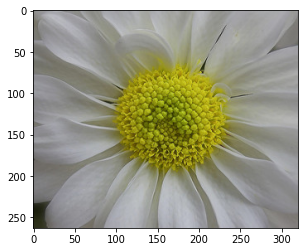

In [13]:
dir = './drive/MyDrive/Machine Learning/Datasets/flowers'
sub = os.listdir(dir)

daisy_dir = dir + "/" + sub[0]
tulip_dir = dir + "/" + sub[2]
rose_dir = dir + "/" + sub[1]

image = load_img(daisy_dir + '/100080576_f52e8ee070_n.jpg')
plt.imshow(image)

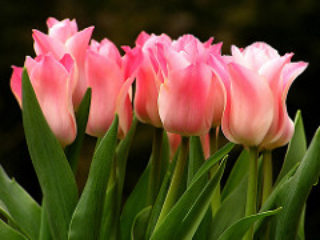

[0 1 0] 



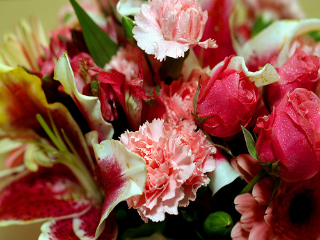

[0 0 1] 



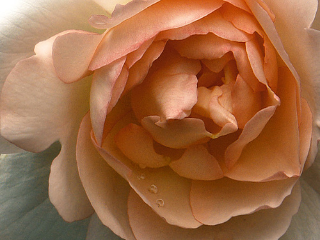

[0 0 1] 



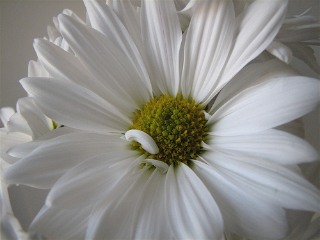

[1 0 0] 



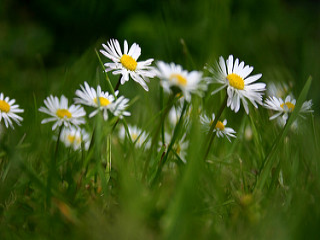

[1 0 0] 



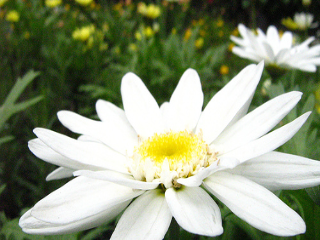

[1 0 0] 



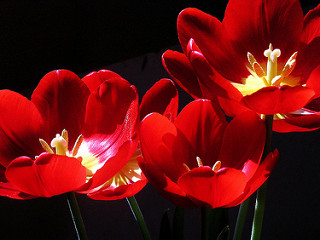

[0 1 0] 



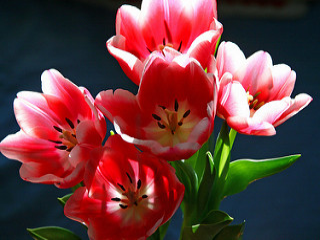

[0 1 0] 



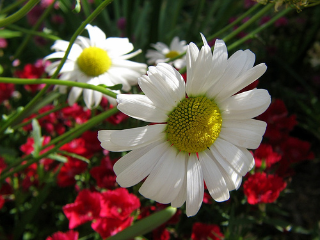

[1 0 0] 



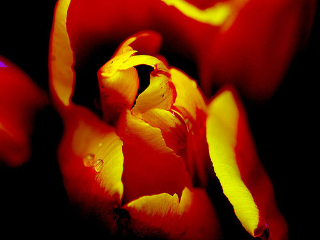

[0 1 0] 



In [21]:
def parse_dataset(folder_path):
  dataset = []
  for label in os.listdir(folder_path):
    label_path = os.path.join(folder_path, label)
    for data in os.listdir(label_path):
      data_path = os.path.join(label_path, data)
      if label == 'daisy':
        label_encoded = np.array([1, 0, 0])

      elif label == 'tulip':
        label_encoded = np.array([0, 1, 0])

      else:
        label_encoded = np.array([0, 0, 1])
      dataset.append((label_encoded, data_path))
      
  return dataset

train_dataset_paths = parse_dataset('/content/drive/MyDrive/Machine Learning/Datasets/flowers/Training')
test_dataset_paths = parse_dataset('/content/drive/MyDrive/Machine Learning/Datasets/flowers/Testing')

random.shuffle(train_dataset_paths)
random.shuffle(test_dataset_paths)

for label, data_path in train_dataset_paths[:10]:
  data = cv2.resize(cv2.imread(data_path), (320, 240))
  cv2_imshow(data)
  print(label, '\n')

**4. Make python code to define grayscale functions (you can use
library).**

In [23]:
def preprocess(img):
  proc = cv2.resize(img, (320, 240))
  proc = cv2.cvtColor(proc, cv2.COLOR_BGR2GRAY)
  proc = proc.flatten()
  return proc
train_dataset = [(label, preprocess(cv2.imread(img_path))) for label, img_path in train_dataset_paths]
test_dataset = [(label, preprocess(cv2.imread(img_path))) for label, img_path in test_dataset_paths]

**5. Make python code to define the sigmoid activation function.**

In [28]:
import numpy as np
def sigmoid(x):
    return 1/(1 + np.exp(-x))

**6. Create python code to define learning algorithm functions
backpropagation - Initialize weights and bias.**

In [29]:
def initialize(model):
  model.theta_input_hidden = np.random.normal(0, 2/INPUT_LAYER_NEURON, (INPUT_LAYER_NEURON, HIDDEN_LAYER_NEURON))
  model.bias_input_hidden = np.random.normal(0, 2/INPUT_LAYER_NEURON, HIDDEN_LAYER_NEURON)
  model.theta_hidden_output = np.random.normal(0, 2/HIDDEN_LAYER_NEURON, (HIDDEN_LAYER_NEURON, OUTPUT_LAYER_NEURON))
  model.bias_hidden_output = np.random.normal(0, 2/HIDDEN_LAYER_NEURON, OUTPUT_LAYER_NEURON)

**7. Create python code to define learning algorithm functions
backpropagation - compute error.**

In [30]:
def calc_err(label, output):
  return  ((output - label)**2)/2

**8. Create python code to define learning algorithm functions
backpropagation - Feedforward.**

In [31]:
def calc_output(input, model):
  hidden_y = sigmoid(np.dot(input, model.theta_input_hidden) + model.bias_input_hidden)
  output_y = sigmoid(np.dot(hidden_y, model.theta_hidden_output) + model.bias_hidden_output)
  return output_y, hidden_y

**9. Create python code to define learning algorithm functions
backpropagation - backward (update weight).**

In [32]:
def update_weight(label, input, model, learning_rate):
  output_y, hidden_y = calc_output(input, model)
  
  hidden_y = hidden_y.reshape((len(hidden_y), 1))
  output_y = output_y.reshape((1, len(output_y)))
  input_reshaped = input.reshape((len(input), 1))

  output_error = calc_err(label, output_y)

  derivative_hidden_output = (output_y - label) * output_y * (1 - output_y)
  dtheta_hidden_output = np.dot(hidden_y, derivative_hidden_output)
  
  hidden_error = np.dot(model.theta_hidden_output, derivative_hidden_output.T)
  derivative_input_hidden = hidden_error * hidden_y * (1 - hidden_y)
  derivative_input_hidden = derivative_input_hidden.reshape((1, len(derivative_input_hidden)))
  dtheta_input_hidden = np.dot(input_reshaped, derivative_input_hidden)

  model.theta_hidden_output -= learning_rate * dtheta_hidden_output / len(train_dataset)
  model.bias_hidden_output -= learning_rate * derivative_hidden_output[0] / len(train_dataset)
  model.theta_input_hidden -= learning_rate * dtheta_input_hidden / len(train_dataset)
  model.bias_input_hidden -= learning_rate * derivative_input_hidden[0] / len(train_dataset)

  return np.sum(calc_err(label, calc_output(input, model)[0]))

**10. Create python code to define learning algorithm functions
backpropagation - prediction.**

In [33]:
def predict(input, model):
  output, _ = calc_output(input, model)
  return np.argmax(output)

**11. Create python code to define learning algorithm functions
backpropagation - defines the accuracy function.**

In [34]:
def calc_accuracy(model):
  correct_count = 0
  for label, data in test_dataset:
    if np.argmax(label) == predict(data, model):
      correct_count += 1
  return correct_count / len(test_dataset)

**12. Make python code to define training ((80% data) and testing (20%) functions
data).**

In [35]:
def train(model, epoch, learning_rate):
  print("\n\nTraining model; epoch =", epoch, "; learning_rate =", learning_rate)
  errors = []
  accuracies = []
  prev_log_string = ''
  for cur_epoch in range(epoch):
    total_error = 0
    for data_index, (label, data) in enumerate(train_dataset):
      cur_error = update_weight(label, data, model, learning_rate)
      total_error += cur_error
      print('\b' * len(prev_log_string), end='')
      prev_log_string = f'EPOCH {cur_epoch + 1}/{epoch}, DATA {data_index}/{len(train_dataset)}'
      if len(errors) > 0:
        prev_log_string += f', MODEL_ERROR: {errors[-1]}'
      print(prev_log_string, end='')
    errors.append(total_error/len(train_dataset))
    accuracies.append(calc_accuracy(model))
  print("FINISH")
  return errors, accuracies

**13. Visualize the error and accuracy of each epoch for 50 epochs, and try using the learning rate = 0.1; learning rate = 0.8**



Training model; epoch = 50 ; learning_rate = 0.1
EPOCH 1/50, DATA 0/240EPOCH 1/50, DATA 1/240EPOCH 1/50, DATA 2/240

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


EPOCH 1/50, DATA 3/240EPOCH 1/50, DATA 4/240EPOCH 1/50, DATA 5/240EPOCH 1/50, DATA 6/240EPOCH 1/50, DATA 7/240EPOCH 1/50, DATA 8/240EPOCH 1/50, DATA 9/240EPOCH 1/50, DATA 10/240EPOCH 1/50, DATA 11/240EPOCH 1/50, DATA 12/240EPOCH 1/50, DATA 13/240EPOCH 1/50, DATA 14/240EPOCH 1/50, DATA 15/240EPOCH 1/50, DATA 16/240EPOCH 1/50, DATA 17/240EPOCH 1/50, DATA 18/240EPOCH 1/50, DATA 19/240EPOCH 1/50, DATA 20/240EPOCH 1/50, DATA 21/240EPOCH 1/50, DATA 22/240EPOCH 1/50, DATA 23/240EPOCH 1/50, DATA 24/240

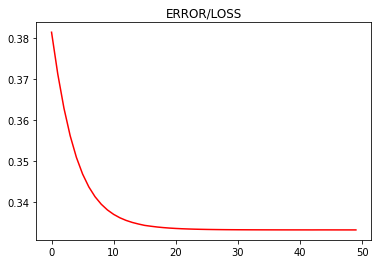

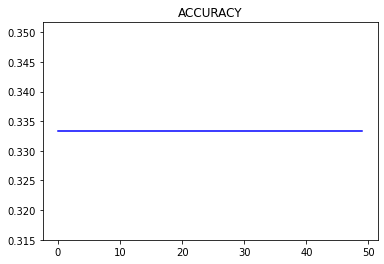



Training model; epoch = 50 ; learning_rate = 0.8
EPOCH 1/50, DATA 0/240EPOCH 1/50, DATA 1/240EPOCH 1/50, DATA 2/240EPOCH 1/50, DATA 3/240EPOCH 1/50, DATA 4/240EPOCH 1/50, DATA 5/240EPOCH 1/50, DATA 6/240EPOCH 1/50, DATA 7/240EPOCH 1/50, DATA 8/240EPOCH 1/50, DATA 9/240EPOCH 1/50, DATA 10/240EPOCH 1/50, DATA 11/240EPOCH 1/50, DATA 12/240EPOCH 1/50, DATA 13/240EPOCH 1/50, DATA 14/240EPOCH 1/50, DATA 15/240EPOCH 1/50, DATA 16/240EPOCH 1/50, DATA 17/240EPOCH 1/50, DATA 18/240EPOCH 1/50, DATA 19/240EPOCH 1/50, DATA 20/240EPO

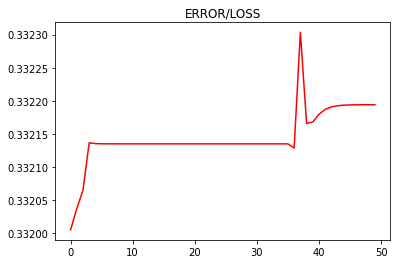

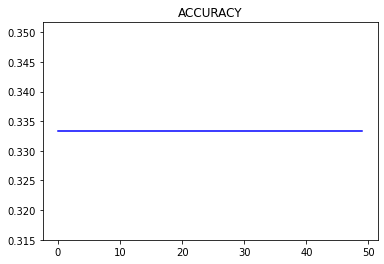

In [37]:
def visualize(errors, accuracies):
  plt.title("ERROR/LOSS")
  plt.plot(errors, 'r-')
  plt.show()
  
  plt.title("ACCURACY")
  plt.plot(accuracies, 'b-')
  plt.show()
 
model_0_1 = MultiLayeredPerceptronWeights()
initialize(model_0_1)
errors_0_1, accuracies_0_1 = train(model_0_1, 50, 0.1)
visualize(errors_0_1, accuracies_0_1)
 
model_0_8 = MultiLayeredPerceptronWeights()
initialize(model_0_8)
errors_0_8, accuracies_0_8 = train(model_0_1, 50, 0.8)
visualize(errors_0_8, accuracies_0_8)